In [1]:
import tensorflow as tf
import os

TRAIN_DIR = os.path.join("dataset", "train")
VALIDATION_DIR = os.path.join("dataset", "valid")
TEST_DIR = os.path.join("dataset", "test")
IMAGE_SIZE = (180, 180)

train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR, image_size=IMAGE_SIZE
)
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    VALIDATION_DIR, image_size=IMAGE_SIZE
)
test_dataset = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR, image_size=IMAGE_SIZE
)
train_dataset


2022-11-03 23:15:13.319115: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-03 23:15:13.479079: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-03 23:15:14.169011: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-03 23:15:14.169144: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

Found 13572 files belonging to 100 classes.


2022-11-03 23:15:16.963571: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:42:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-03 23:15:16.972026: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:42:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-03 23:15:16.972512: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:42:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-03 23:15:16.973047: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

Found 500 files belonging to 100 classes.
Found 500 files belonging to 100 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [2]:
train_dataset.class_names


['air hockey',
 'ampute football',
 'archery',
 'arm wrestling',
 'axe throwing',
 'balance beam',
 'barell racing',
 'baseball',
 'basketball',
 'baton twirling',
 'bike polo',
 'billiards',
 'bmx',
 'bobsled',
 'bowling',
 'boxing',
 'bull riding',
 'bungee jumping',
 'canoe slamon',
 'cheerleading',
 'chuckwagon racing',
 'cricket',
 'croquet',
 'curling',
 'disc golf',
 'fencing',
 'field hockey',
 'figure skating men',
 'figure skating pairs',
 'figure skating women',
 'fly fishing',
 'football',
 'formula 1 racing',
 'frisbee',
 'gaga',
 'giant slalom',
 'golf',
 'hammer throw',
 'hang gliding',
 'harness racing',
 'high jump',
 'hockey',
 'horse jumping',
 'horse racing',
 'horseshoe pitching',
 'hurdles',
 'hydroplane racing',
 'ice climbing',
 'ice yachting',
 'jai alai',
 'javelin',
 'jousting',
 'judo',
 'lacrosse',
 'log rolling',
 'luge',
 'motorcycle racing',
 'mushing',
 'nascar racing',
 'olympic wrestling',
 'parallel bar',
 'pole climbing',
 'pole dancing',
 'pole vau

In [3]:
def get_my_xception_model(image_size, num_classes):
    model_in = tf.keras.layers.Input((*image_size, 3))
    # Data augmentation
    # x = tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal")(model_in)
    # x = tf.keras.layers.experimental.preprocessing.RandomRotation(0.1)(x)
    # x = tf.keras.layers.experimental.preprocessing.RandomZoom(0.1)(x)
    # Extraction
    # x = tf.keras.layers.Rescaling(1.0 / 255)(x)
    x = model_in
    x = tf.keras.layers.Conv2D(32, 5, use_bias=False)(x)
    block_in = x
    for channel in [32, 64, 128, 256, 512]:
        x = tf.keras.layers.BatchNormalization()(block_in)
        x = tf.keras.layers.ReLU()(x)
        x = tf.keras.layers.SeparableConv2D(channel, 3, padding="same", use_bias=False)(
            x
        )
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.ReLU()(x)
        x = tf.keras.layers.SeparableConv2D(channel, 3, padding="same", use_bias=False)(
            x
        )
        x = tf.keras.layers.MaxPool2D(3, strides=2, padding="same")(x)
        y = tf.keras.layers.Conv2D(
            channel, 1, strides=2, padding="same", use_bias=False
        )(block_in)
        block_out = tf.keras.layers.add([x, y])
        block_in = block_out
    x = tf.keras.layers.GlobalAveragePooling2D()(block_out)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(num_classes)(x)
    model_out = tf.keras.layers.Softmax()(x)
    return tf.keras.Model(inputs=[model_in], outputs=[model_out])


my_model = get_my_xception_model(IMAGE_SIZE, len(train_dataset.class_names))
my_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 176, 176, 32  2400        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 176, 176, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [4]:
my_model.compile(
    optimizer="rmsprop",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)


In [5]:
num_epochs = 200
my_model_history = my_model.fit(
    train_dataset,
    batch_size=32,
    epochs=num_epochs,
    validation_data=validation_dataset,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor="val_sparse_categorical_accuracy",
            patience=10,
            restore_best_weights=True,
        ),
        tf.keras.callbacks.ModelCheckpoint(
            "model_weight",
            monitor="val_sparse_categorical_accuracy",
            save_best_only=True,
        ),
    ],
)


Epoch 1/200


2022-11-03 23:15:25.866518: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8101
2022-11-03 23:15:26.542067: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


425/425 [==============================] - ETA: 0s - loss: 7.4578 - sparse_categorical_accuracy: 0.0253

INFO:tensorflow:Assets written to: model_weight/assets


INFO:tensorflow:Assets written to: model_weight/assets


425/425 [==============================] - 44s 90ms/step - loss: 7.4578 - sparse_categorical_accuracy: 0.0253 - val_loss: 5.3148 - val_sparse_categorical_accuracy: 0.0280
Epoch 2/200
424/425 [============================>.] - ETA: 0s - loss: 4.3245 - sparse_categorical_accuracy: 0.0602

INFO:tensorflow:Assets written to: model_weight/assets


INFO:tensorflow:Assets written to: model_weight/assets


425/425 [==============================] - 37s 87ms/step - loss: 4.3244 - sparse_categorical_accuracy: 0.0602 - val_loss: 4.7965 - val_sparse_categorical_accuracy: 0.0360
Epoch 3/200
425/425 [==============================] - 33s 76ms/step - loss: 3.7751 - sparse_categorical_accuracy: 0.1149 - val_loss: 5.9774 - val_sparse_categorical_accuracy: 0.0220
Epoch 4/200
424/425 [============================>.] - ETA: 0s - loss: 3.4022 - sparse_categorical_accuracy: 0.1716

INFO:tensorflow:Assets written to: model_weight/assets


INFO:tensorflow:Assets written to: model_weight/assets


425/425 [==============================] - 37s 88ms/step - loss: 3.4023 - sparse_categorical_accuracy: 0.1716 - val_loss: 5.6894 - val_sparse_categorical_accuracy: 0.0580
Epoch 5/200
425/425 [==============================] - 33s 76ms/step - loss: 3.0845 - sparse_categorical_accuracy: 0.2401 - val_loss: 7.2416 - val_sparse_categorical_accuracy: 0.0460
Epoch 6/200
425/425 [==============================] - 32s 76ms/step - loss: 2.7831 - sparse_categorical_accuracy: 0.2975 - val_loss: 10.5119 - val_sparse_categorical_accuracy: 0.0200
Epoch 7/200
424/425 [============================>.] - ETA: 0s - loss: 2.5443 - sparse_categorical_accuracy: 0.3501

INFO:tensorflow:Assets written to: model_weight/assets


INFO:tensorflow:Assets written to: model_weight/assets


425/425 [==============================] - 37s 87ms/step - loss: 2.5445 - sparse_categorical_accuracy: 0.3501 - val_loss: 4.5962 - val_sparse_categorical_accuracy: 0.1080
Epoch 8/200
425/425 [==============================] - 32s 76ms/step - loss: 2.3032 - sparse_categorical_accuracy: 0.4034 - val_loss: 8.9020 - val_sparse_categorical_accuracy: 0.0300
Epoch 9/200
424/425 [============================>.] - ETA: 0s - loss: 2.1348 - sparse_categorical_accuracy: 0.4405

INFO:tensorflow:Assets written to: model_weight/assets


INFO:tensorflow:Assets written to: model_weight/assets


425/425 [==============================] - 37s 87ms/step - loss: 2.1351 - sparse_categorical_accuracy: 0.4404 - val_loss: 3.9791 - val_sparse_categorical_accuracy: 0.1520
Epoch 10/200
425/425 [==============================] - 32s 76ms/step - loss: 1.9485 - sparse_categorical_accuracy: 0.4890 - val_loss: 7.7917 - val_sparse_categorical_accuracy: 0.0420
Epoch 11/200
425/425 [==============================] - 32s 76ms/step - loss: 1.7941 - sparse_categorical_accuracy: 0.5231 - val_loss: 5.6333 - val_sparse_categorical_accuracy: 0.0800
Epoch 12/200
425/425 [==============================] - 32s 76ms/step - loss: 1.6451 - sparse_categorical_accuracy: 0.5609 - val_loss: 5.0725 - val_sparse_categorical_accuracy: 0.1060
Epoch 13/200
424/425 [============================>.] - ETA: 0s - loss: 1.5264 - sparse_categorical_accuracy: 0.5875

INFO:tensorflow:Assets written to: model_weight/assets


INFO:tensorflow:Assets written to: model_weight/assets


425/425 [==============================] - 37s 87ms/step - loss: 1.5266 - sparse_categorical_accuracy: 0.5875 - val_loss: 4.4205 - val_sparse_categorical_accuracy: 0.1880
Epoch 14/200
425/425 [==============================] - 33s 77ms/step - loss: 1.4183 - sparse_categorical_accuracy: 0.6159 - val_loss: 7.3735 - val_sparse_categorical_accuracy: 0.0480
Epoch 15/200
425/425 [==============================] - 33s 77ms/step - loss: 1.3108 - sparse_categorical_accuracy: 0.6421 - val_loss: 5.2665 - val_sparse_categorical_accuracy: 0.1280
Epoch 16/200
425/425 [==============================] - 33s 77ms/step - loss: 1.1936 - sparse_categorical_accuracy: 0.6644 - val_loss: 5.2018 - val_sparse_categorical_accuracy: 0.1560
Epoch 17/200
425/425 [==============================] - 33s 76ms/step - loss: 1.1382 - sparse_categorical_accuracy: 0.6821 - val_loss: 6.0213 - val_sparse_categorical_accuracy: 0.1160
Epoch 18/200
424/425 [============================>.] - ETA: 0s - loss: 1.0306 - sparse_categ

INFO:tensorflow:Assets written to: model_weight/assets


INFO:tensorflow:Assets written to: model_weight/assets


425/425 [==============================] - 37s 87ms/step - loss: 1.0307 - sparse_categorical_accuracy: 0.7095 - val_loss: 3.9577 - val_sparse_categorical_accuracy: 0.2320
Epoch 19/200
424/425 [============================>.] - ETA: 0s - loss: 0.9691 - sparse_categorical_accuracy: 0.7296

INFO:tensorflow:Assets written to: model_weight/assets


INFO:tensorflow:Assets written to: model_weight/assets


425/425 [==============================] - 37s 88ms/step - loss: 0.9690 - sparse_categorical_accuracy: 0.7297 - val_loss: 3.2607 - val_sparse_categorical_accuracy: 0.2860
Epoch 20/200
425/425 [==============================] - 33s 77ms/step - loss: 0.8927 - sparse_categorical_accuracy: 0.7467 - val_loss: 5.4602 - val_sparse_categorical_accuracy: 0.1680
Epoch 21/200
424/425 [============================>.] - ETA: 0s - loss: 0.8267 - sparse_categorical_accuracy: 0.7594

INFO:tensorflow:Assets written to: model_weight/assets


INFO:tensorflow:Assets written to: model_weight/assets


425/425 [==============================] - 37s 88ms/step - loss: 0.8266 - sparse_categorical_accuracy: 0.7594 - val_loss: 3.1455 - val_sparse_categorical_accuracy: 0.3700
Epoch 22/200
425/425 [==============================] - 32s 76ms/step - loss: 0.7652 - sparse_categorical_accuracy: 0.7773 - val_loss: 3.5416 - val_sparse_categorical_accuracy: 0.2960
Epoch 23/200
424/425 [============================>.] - ETA: 0s - loss: 0.7198 - sparse_categorical_accuracy: 0.7876

INFO:tensorflow:Assets written to: model_weight/assets


INFO:tensorflow:Assets written to: model_weight/assets


425/425 [==============================] - 37s 87ms/step - loss: 0.7198 - sparse_categorical_accuracy: 0.7876 - val_loss: 2.2496 - val_sparse_categorical_accuracy: 0.4820
Epoch 24/200
425/425 [==============================] - 33s 77ms/step - loss: 0.6724 - sparse_categorical_accuracy: 0.8045 - val_loss: 6.3457 - val_sparse_categorical_accuracy: 0.1860
Epoch 25/200
425/425 [==============================] - 32s 76ms/step - loss: 0.6106 - sparse_categorical_accuracy: 0.8168 - val_loss: 3.0406 - val_sparse_categorical_accuracy: 0.3600
Epoch 26/200
425/425 [==============================] - 32s 76ms/step - loss: 0.5938 - sparse_categorical_accuracy: 0.8226 - val_loss: 3.4883 - val_sparse_categorical_accuracy: 0.3320
Epoch 27/200
425/425 [==============================] - 33s 77ms/step - loss: 0.5442 - sparse_categorical_accuracy: 0.8389 - val_loss: 3.7745 - val_sparse_categorical_accuracy: 0.3160
Epoch 28/200
425/425 [==============================] - 32s 76ms/step - loss: 0.5147 - sparse

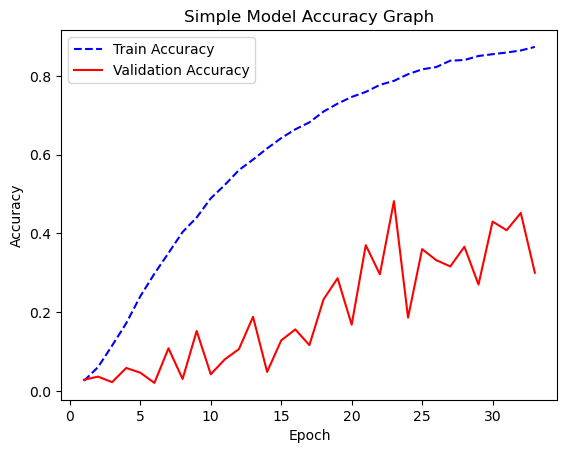

In [6]:
import matplotlib.pyplot as plt
epoch_range = range(1, len(my_model_history.history["sparse_categorical_accuracy"]) + 1)
plt.plot(epoch_range, my_model_history.history["sparse_categorical_accuracy"], "b--", label="Train Accuracy")
plt.plot(epoch_range, my_model_history.history["val_sparse_categorical_accuracy"], "r", label="Validation Accuracy")
plt.title("Simple Model Accuracy Graph")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()